<a href="https://colab.research.google.com/github/AdamPoi/PCVK/blob/main/PCVK_week06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 6 HISTOGRAM

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from google.colab import drive
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


## Menampilkan Histogram dari Sebuah Gambar

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

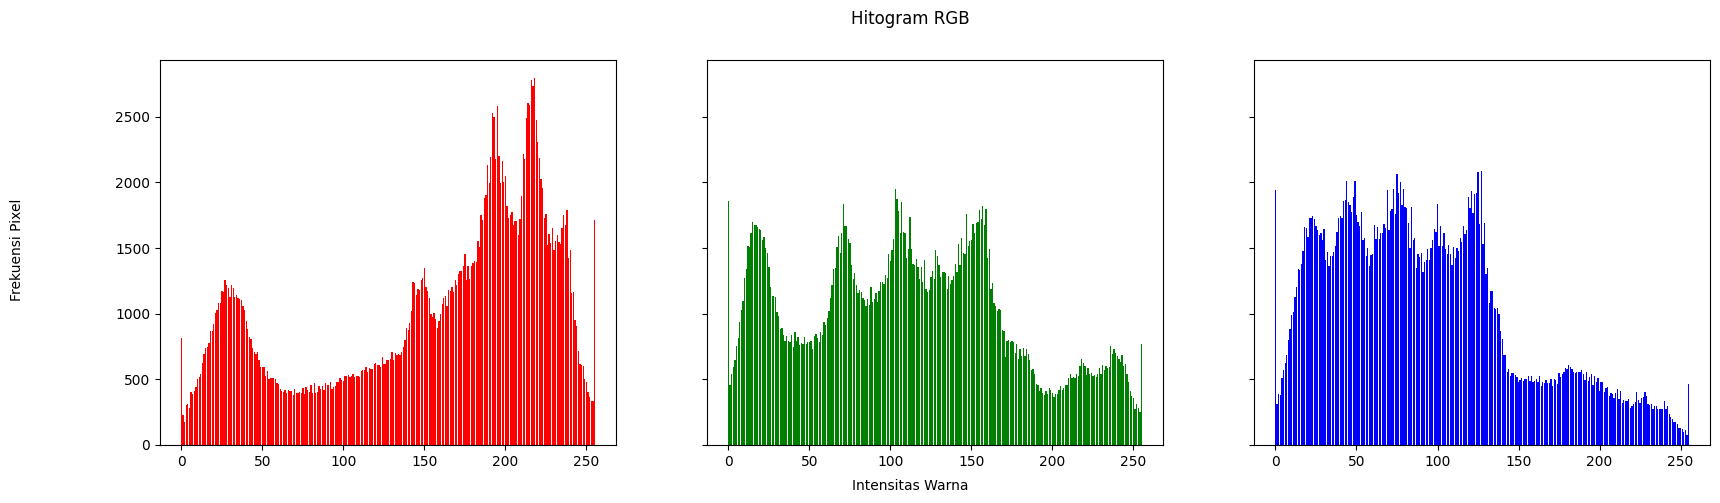

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
height, width, depth = np.shape(img)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0, width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Hitogram RGB')
fig.text(0.05, 0.5, 'Frekuensi Pixel', va='center', rotation='vertical')
fig.text(0.5, 0.02, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

### Menggunakan Numpy

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

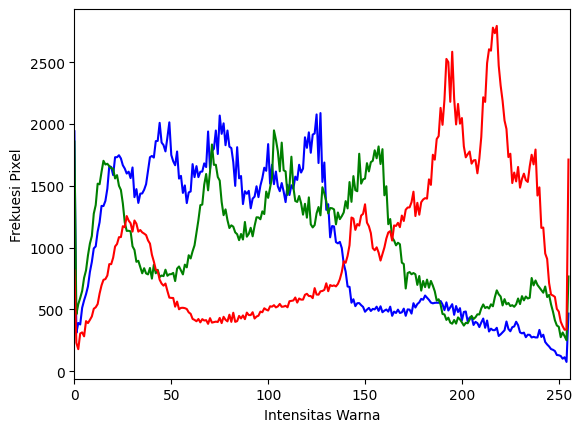

In [5]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
colors = ("b", "g", "r")
channel_ids = (0,1,2)

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.ylabel("Frekuesi Pixel")
plt.xlabel("Intensitas Warna")

plt.show()

### Menggunakan OpenCV2


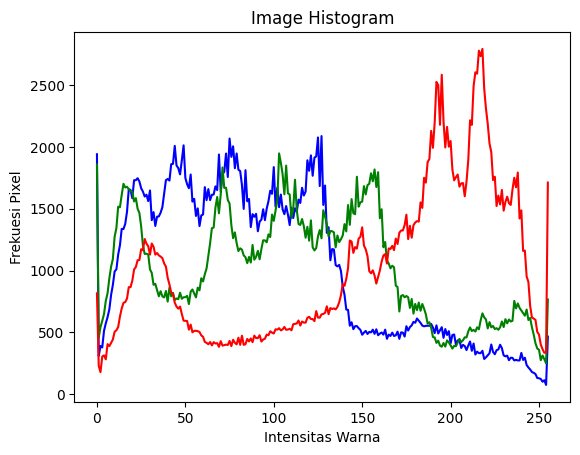

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

def histColor(img):
  colors = ("b", "g", "r")
  channel_ids = (0,1,2)
  hists = []

  for i,color in enumerate(colors):
    hist = cv.calcHist([img],channels=[i],mask=None,histSize=[256],ranges=[0,256])
    plt.plot(hist,color = color)
  plt.title('Image Histogram')
  plt.ylabel("Frekuesi Pixel")
  plt.xlabel("Intensitas Warna")
  plt.show()

histColor(img)



## Histogram Equalizations

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [7]:
def getHistogram(img1):
  height, width, depth = np.shape(img1)
  hist = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      hist[0][img1[y][x][0]] += 1
      hist[1][img1[y][x][1]] += 1
      hist[2][img1[y][x][2]] += 1
  return hist

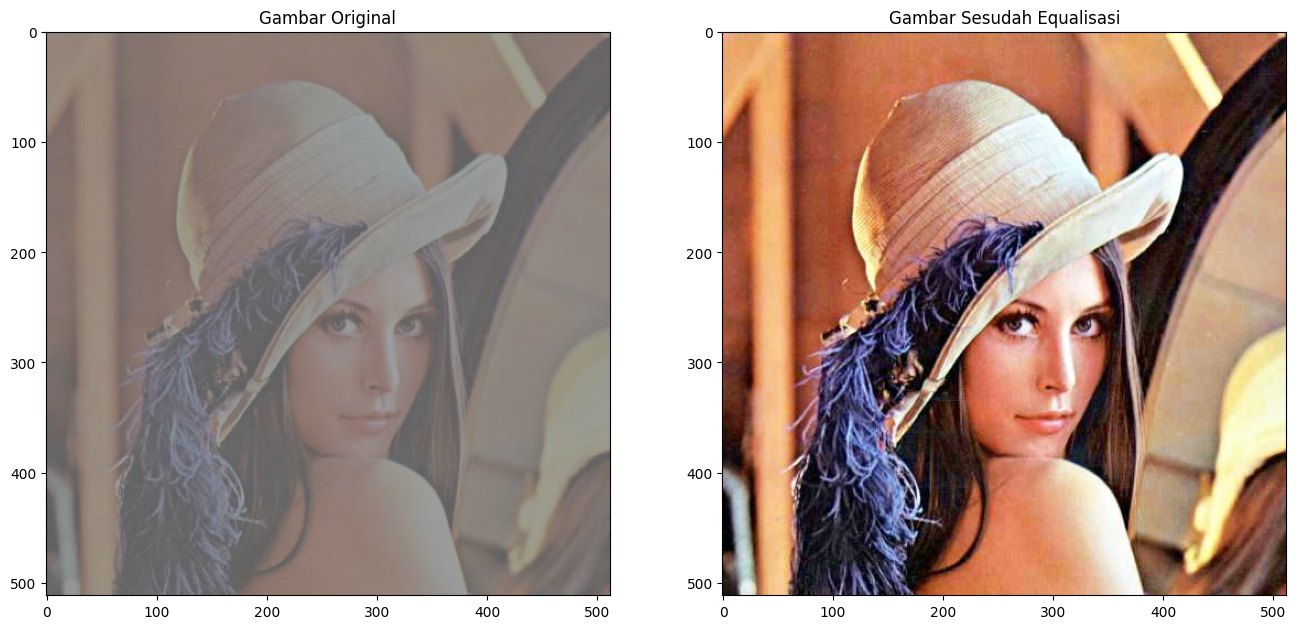

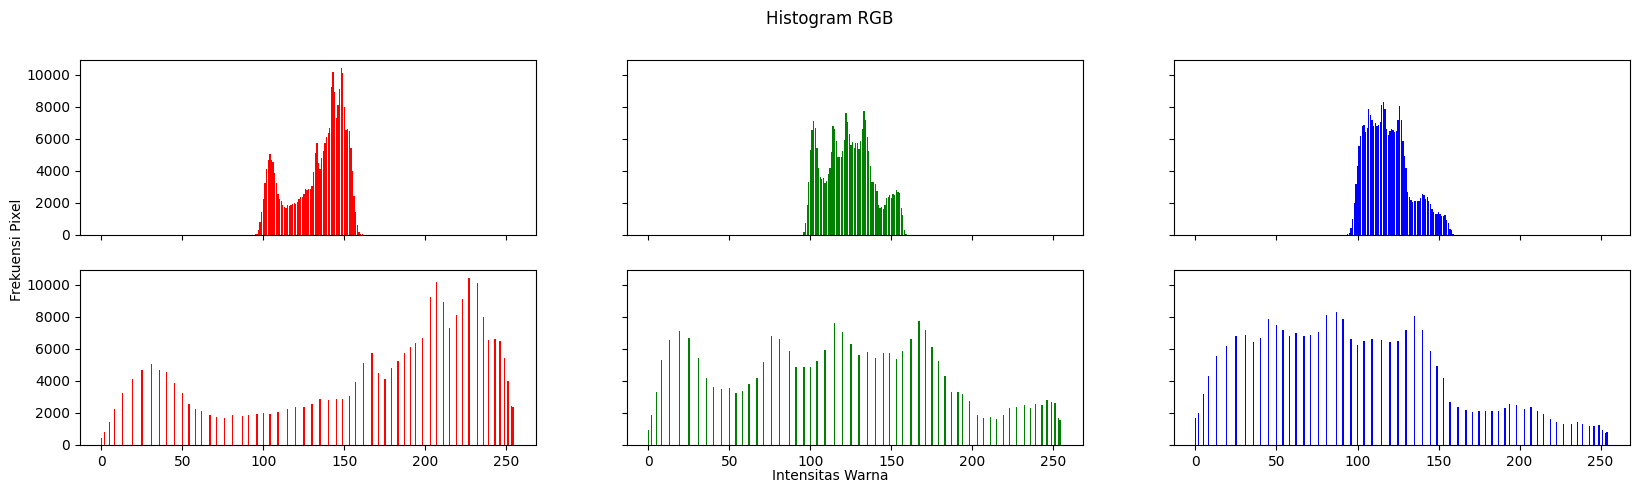

In [32]:

original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

histo_asli = getHistogram(original)

img_array = np.asarray(original)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]

equalized_image = np.reshape(np.asarray(eq_img_list), img_array.shape)

equal_histo = getHistogram(equalized_image)

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].imshow(cv.cvtColor(original,cv.COLOR_BGR2RGB))
axs[0].set_title('Gambar Original')
axs[1].imshow(cv.cvtColor(equalized_image,cv.COLOR_BGR2RGB))
axs[1].set_title('Gambar Sesudah Equalisasi')

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
    fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB')
    fig.text(0.09, 0.5, 'Frekuensi Pixel', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='red')
    axs[0,1].bar(names, histo_asli[1], color='green')
    axs[0,2].bar(names, histo_asli[0], color='blue')
    axs[1,0].bar(names, equal_histo[2], color='red')
    axs[1,1].bar(names, equal_histo[1], color='green')
    axs[1,2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
    fig. suptitle('Histogram RGB')
    fig.text(0.09, 0.5, 'Frekuensi Pixel', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan . tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

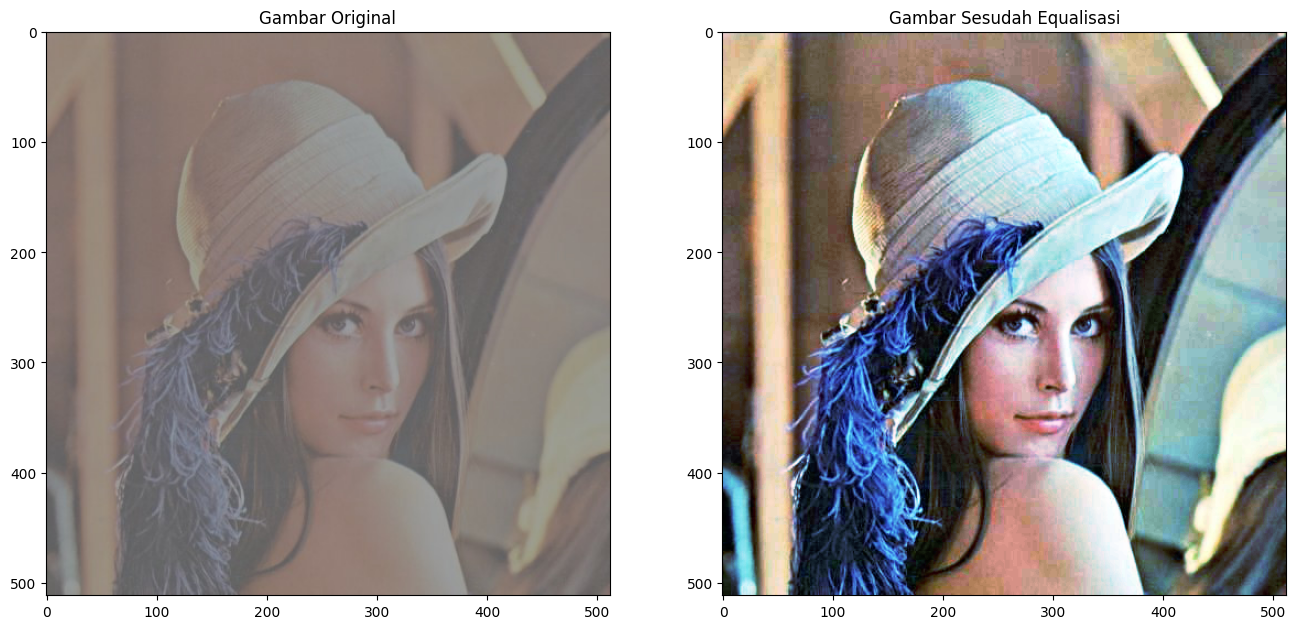

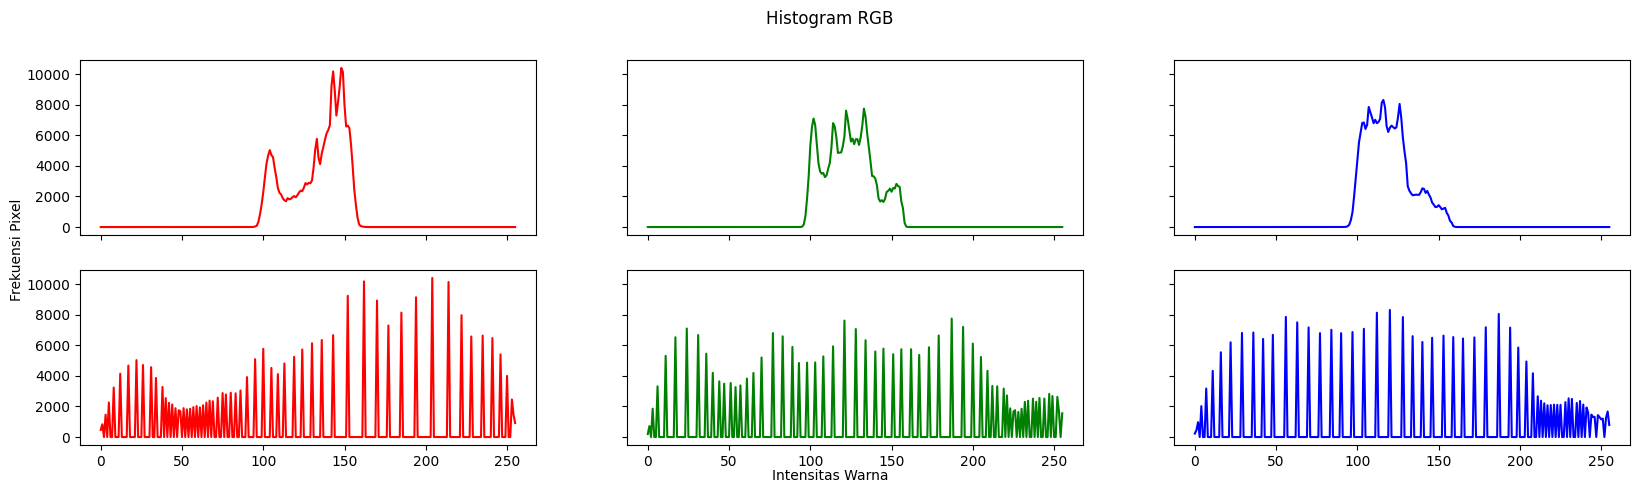

In [31]:

original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

blue_channel, green_channel, red_channel = cv.split(original)

blue_equalized = cv.equalizeHist(blue_channel)
green_equalized = cv.equalizeHist(green_channel)
red_equalized = cv.equalizeHist(red_channel)

equalized_image = cv.merge((blue_equalized, green_equalized, red_equalized))

hist_before_blue = cv.calcHist([original], [0], None, [256], [0, 256])
hist_before_green = cv.calcHist([original], [1], None, [256], [0, 256])
hist_before_red = cv.calcHist([original], [2], None, [256], [0, 256])

hist_after_blue = cv.calcHist([equalized_image], [0], None, [256], [0, 256])
hist_after_green = cv.calcHist([equalized_image], [1], None, [256], [0, 256])
hist_after_red = cv.calcHist([equalized_image], [2], None, [256], [0, 256])

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].imshow(cv.cvtColor(original,cv.COLOR_BGR2RGB))
axs[0].set_title('Gambar Original')
axs[1].imshow(cv.cvtColor(equalized_image,cv.COLOR_BGR2RGB))
axs[1].set_title('Gambar Sesudah Equalisasi')


fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB')
fig.text(0.09, 0.5, 'Frekuensi Pixel', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].plot(hist_before_red, color='red')
axs[0,1].plot(hist_before_green, color='green')
axs[0,2].plot(hist_before_blue, color='blue')
axs[1,0].plot(hist_after_red, color='red')
axs[1,1].plot(hist_after_green, color='green')
axs[1,2].plot(hist_after_blue, color='blue')



## Pemetaan Warna

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

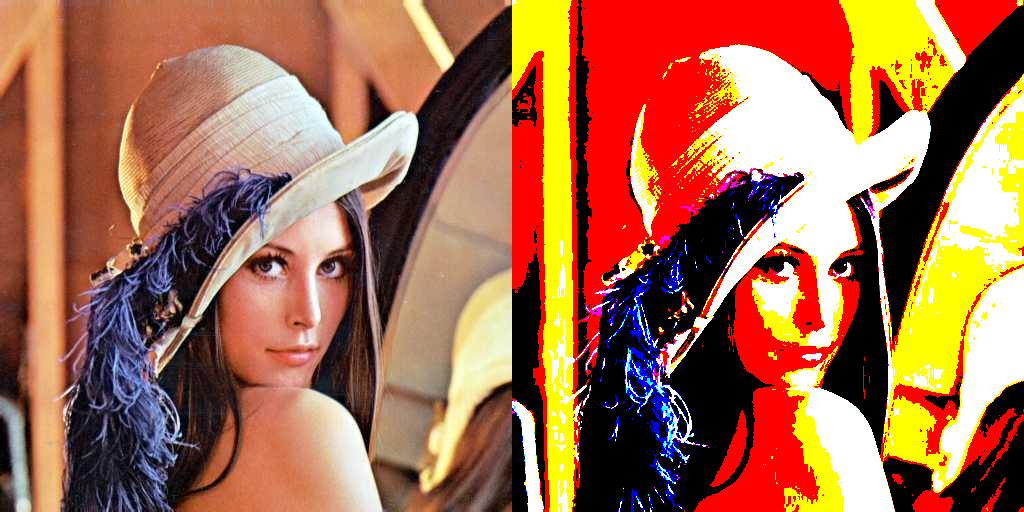

In [14]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
image_16 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_8 = np.zeros(image_16.shape, image_16.dtype)

for y in range(0, image_16.shape[0]):
  for x in range(0, image_16.shape[1]):
    baru = warnaTerdekat(image_16[y, x, 0], image_16[y, x, 1], image_16[y, x, 2])
    image_8[y, x] = warnaPallette[baru]

image_16 = cv.cvtColor(image_16, cv.COLOR_BGR2RGB)
image_8 = cv.cvtColor(image_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((image_16, image_8))
cv2_imshow(final_frame)


8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

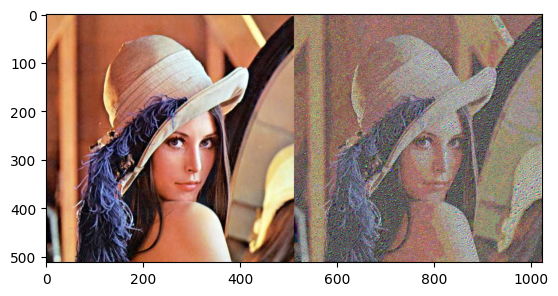

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

dithered_image = cv.cvtColor(original, cv.COLOR_BGR2RGB)
height,width,deepth = dithered_image.shape

for y in range(height - 1):
    for x in range(width - 1):
        old_pixel_blue = dithered_image[y, x, 0]
        old_pixel_green = dithered_image[y, x, 1]
        old_pixel_red = dithered_image[y, x, 2]

        pixel_distance=1
        new_pixel_blue = np.round(pixel_distance * (old_pixel_blue/255))*(255/pixel_distance)
        new_pixel_green = np.round(pixel_distance * (old_pixel_green/255))*(255/pixel_distance)
        new_pixel_red = np.round(pixel_distance * (old_pixel_red/255))*(255/pixel_distance)

        error_blue = old_pixel_blue - new_pixel_blue
        error_green = old_pixel_green - new_pixel_green
        error_red = old_pixel_red - new_pixel_red

        if x < dithered_image.shape[1] - 1:
            dithered_image[y, x + 1, 0] = dithered_image[y, x + 1, 0] + error_blue * 7 / 16
            dithered_image[y, x + 1, 1] = dithered_image[y, x + 1, 1] + error_green * 7 / 16
            dithered_image[y, x + 1, 2] = dithered_image[y, x + 1, 2] + error_red * 7 / 16
        if x > 0 and y < dithered_image.shape[0] - 1:
            dithered_image[y + 1, x - 1, 0] = dithered_image[y + 1, x - 1, 0] + error_blue * 3 / 16
            dithered_image[y + 1, x - 1, 1] = dithered_image[y + 1, x - 1, 1] + error_green * 3 / 16
            dithered_image[y + 1, x - 1, 2] = dithered_image[y + 1, x - 1, 2] + error_red * 3 / 16
        if y < dithered_image.shape[0] - 1:
            dithered_image[y + 1, x, 0] = dithered_image[y + 1, x, 0] + error_blue * 5 / 16
            dithered_image[y + 1, x, 1] = dithered_image[y + 1, x, 1] + error_green * 5 / 16
            dithered_image[y + 1, x, 2] = dithered_image[y + 1, x, 2] + error_red * 5 / 16
        if x < dithered_image.shape[1] - 1 and y < dithered_image.shape[0] - 1:
            dithered_image[y + 1, x + 1, 0] = dithered_image[y + 1, x + 1, 0] + error_blue * 1 / 16
            dithered_image[y + 1, x + 1, 1] = dithered_image[y + 1, x + 1, 1] + error_green * 1 / 16
            dithered_image[y + 1, x + 1, 2] = dithered_image[y + 1, x + 1, 2] + error_red * 1 / 16


final_frame = cv.hconcat((cv.cvtColor(original, cv.COLOR_BGR2RGB), dithered_image))
plt.imshow(final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

(-0.5, 511.5, 511.5, -0.5)

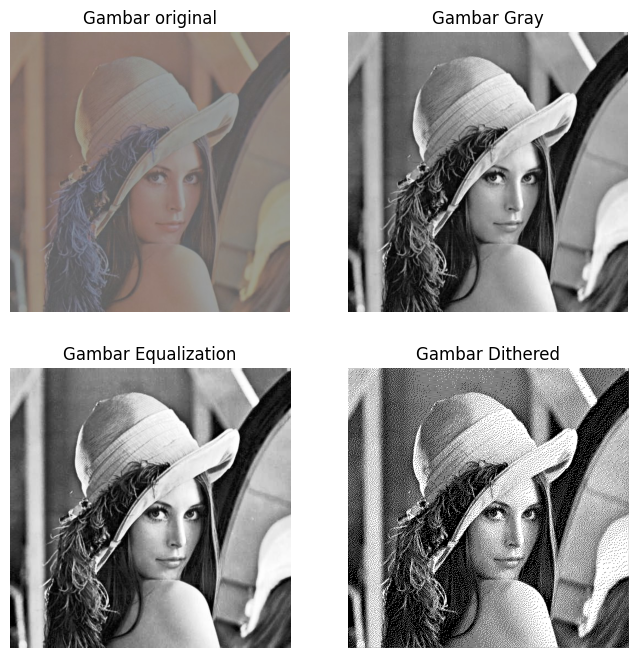

In [83]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
equ_image = cv.equalizeHist(gray_image)
dithered_image=equ_image.copy()

def thresholding(n):
  if(n>255):n=255
  if(n<0):n=0
  return n

height,width = gray_image.shape
for y in range(height - 1):
    for x in range(width - 1):
        old_pixel = dithered_image[y, x]
        threshold = 128
        new_pixel = np.round(pixel_distance * (old_pixel/255))*(255/pixel_distance)

        dithered_image[y, x] = new_pixel
        error = old_pixel - new_pixel


        if (x < width - 1):
            new_value = dithered_image[y, x + 1] + error * 7 / 16
            dithered_image[y, x + 1] = thresholding(new_value)

        if (x > 0 and y < height - 1):
            new_value = dithered_image[y + 1, x - 1] + error * 3 / 16
            dithered_image[y + 1, x - 1] = thresholding(new_value)

        if (y < height - 1):
            new_value = dithered_image[y + 1, x] + error * 5 / 16
            dithered_image[y + 1, x] = thresholding(new_value)

        if (x < width - 1 and y < height - 1):
            new_value = dithered_image[y + 1, x + 1] + error * 1 / 16
            dithered_image[y + 1, x + 1] = thresholding(new_value)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0,0].imshow(cv.cvtColor(original,cv.COLOR_BGR2RGB))
axs[0,0].set_title('Gambar original')
axs[0,0].axis('off')
axs[0,1].imshow(cv.cvtColor(gray_image,cv.COLOR_GRAY2RGB))
axs[0,1].set_title('Gambar Gray')
axs[0,1].axis('off')
axs[1,0].imshow(cv.cvtColor(equ_image,cv.COLOR_GRAY2RGB))
axs[1,0].set_title('Gambar Equalization')
axs[1,0].axis('off')
axs[1,1].imshow(cv.cvtColor(dithered_image,cv.COLOR_GRAY2RGB))
axs[1,1].set_title('Gambar Dithered')
axs[1,1].axis('off')
